In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%load_ext autoreload
%autoreload 2

In [2]:
# Our libraries
from proj1_helpers import *
from proj1_input_manipulation import *
from proj1_linear_model import *

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
DATA_TRAIN_PATH = '../Data/train.csv' # train data path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

### Exploratory data analysis

In [4]:
one_indeces = np.where(y==1)[0]
minus_one_indeces = np.where(y==-1)[0]

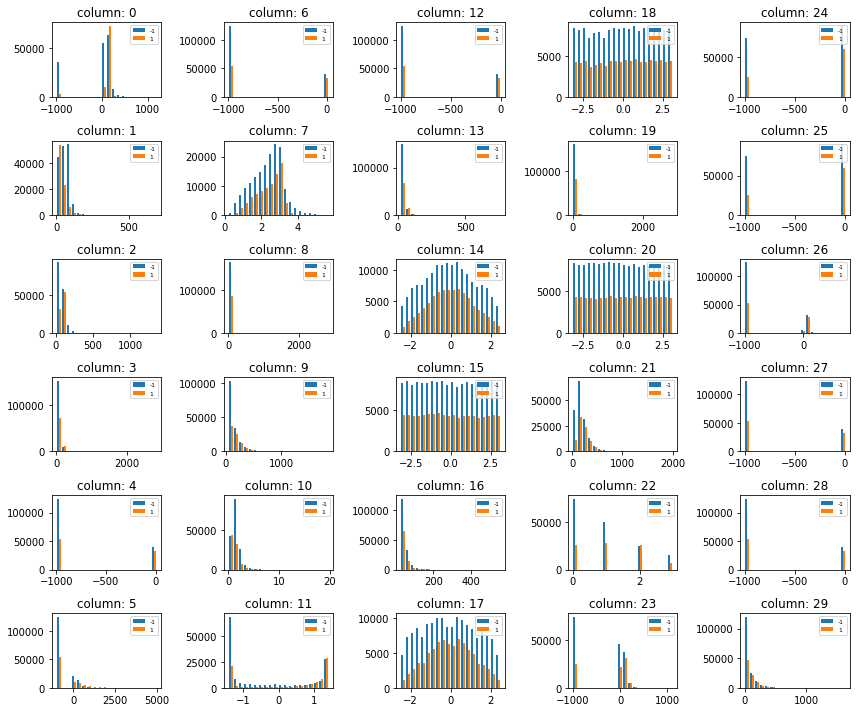

In [5]:
fig, ax = plt.subplots(6,5,figsize= (12,10), sharey = False, sharex = False)
plt.style.use('seaborn-deep')
for i in range(tX.shape[1]):
    sbplt = ax[i%6, math.floor(i/6)]
    sbplt.hist([tX[minus_one_indeces,i], tX[one_indeces,i]],bins = 20, label = ['-1', '1'])
    sbplt.legend(loc='upper right', prop={'size': 6})
    sbplt.set_title('column: {}'.format(i))
    
fig.tight_layout()

### Changing the labels to {0,1}

In [6]:
# change the array from -1 1 to 0 1
# label simplification
# y == 0 non detected Boson, y == 1 detected Boson
y_ = np.array([0 if l == -1 else 1 for l in y])

# All of the following parts are the same for the test set, should be functions

# less code = better code (in this case)

### Dividing the features by the number of jets

In [7]:
tX_0, tX_1, tX_2, tX_3 = alternative_split_to_Jet_Num(tX)

### Dividing also the output by the type of particle

In [8]:
y_0, y_1, y_2, y_3 = alternative_split_labels_to_Jet_Num(y_, tX)

### Adding a column of zeros and ones to detect whether the mass has been measured or not

In [9]:
# take the indices where the mass is not calculated, add the column which has 0 in those indices
# and 1 everywhere else for all matrices 0,1,2_3
tX_0 = find_mass(tX_0)
tX_1 = find_mass(tX_1)
tX_2 = find_mass(tX_2)
tX_3 = find_mass(tX_3)

### Throwing away the outliers from the training data

In [10]:
tX_0, col_to_delete_0 = fix_array(tX_0, 0)
tX_1, col_to_delete_1 = fix_array(tX_1, 1)
tX_2, _ = fix_array(tX_2, 2)
tX_3, _ = fix_array(tX_3, 3)

### Now we substitute the -999 values with the median

In [11]:
tX_0, column_median_0 = fix_median(tX_0)
tX_1, column_median_1 = fix_median(tX_1)
tX_2, column_median_2 = fix_median(tX_2)
tX_3, column_median_3 = fix_median(tX_3)

### Now we standardize the data

In [12]:
tX_3[:,1:], mean_3, std_3 = standardize(tX_3[:,1:])
tX_2[:,1:], mean_2, std_2 = standardize(tX_2[:,1:]) #we standardize everything apart from the column added manually
tX_0[:,1:], mean_0, std_0 = standardize(tX_0[:,1:])
tX_1[:,1:], mean_1, std_1 = standardize(tX_1[:,1:])

### We insert the column for the bias term

In [13]:
tX_tilda_0 = np.insert(tX_0, 0, np.ones(tX_0.shape[0]), axis=1)
tX_tilda_1 = np.insert(tX_1, 0, np.ones(tX_1.shape[0]), axis=1)
tX_tilda_2 = np.insert(tX_2, 0, np.ones(tX_2.shape[0]), axis=1)
tX_tilda_3 = np.insert(tX_3, 0, np.ones(tX_3.shape[0]), axis=1)

## Do your thing crazy machine learning thing here :) ...

## The following cells of code aim at finetuning the hyperparameters of the code

### Calculate the optimal degree for gradient descent

In [14]:
print("For Number of Jets = 0:")
degree_opt_0_GD = finetune_GD(tX_tilda_0, y_0)
print("For Number of Jets = 1:")
degree_opt_1_GD = finetune_GD(tX_tilda_1, y_1)
print("For Number of Jets = 2:")
degree_opt_2_GD = finetune_GD(tX_tilda_2, y_2)
print("For Number of Jets = 3:")
degree_opt_3_GD = finetune_GD(tX_tilda_3, y_3)

For Number of Jets = 0:


/home/john/Documents/MachineLearning/Machine-Learning-P1/Code/proj1_helpers.py:118: RuntimeWarning: invalid value encountered in matmul
  gradient = -(1/N) * (tX.T) @ (e)
/home/john/Documents/MachineLearning/Machine-Learning-P1/Code/implementations.py:10: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * gradient # conduct a step of gradient descent
/home/john/Documents/MachineLearning/Machine-Learning-P1/Code/proj1_helpers.py:103: RuntimeWarning: overflow encountered in matmul
  e = y - tX @ w
/home/john/Documents/MachineLearning/Machine-Learning-P1/Code/proj1_helpers.py:117: RuntimeWarning: overflow encountered in matmul
  e = y - tX @ w


the degree which maximises the accuracy is 2
which correspond to an accuracy of 0.8269477139883098
For Number of Jets = 1:
the degree which maximises the accuracy is 3
which correspond to an accuracy of 0.7937686990611781
For Number of Jets = 2:
the degree which maximises the accuracy is 3
which correspond to an accuracy of 0.8188423058599332
For Number of Jets = 3:
the degree which maximises the accuracy is 3
which correspond to an accuracy of 0.8212867713409132


In [15]:
w_GD_0 = optimal_weights_GD(tX_tilda_0,y_0,degree_opt_0_GD)
w_GD_1 = optimal_weights_GD(tX_tilda_1,y_1,degree_opt_1_GD)
w_GD_2 = optimal_weights_GD(tX_tilda_2,y_2,degree_opt_2_GD)
w_GD_3 = optimal_weights_GD(tX_tilda_3,y_3,degree_opt_3_GD)

# Generate predictions and save ouput in csv format for submission:

In [16]:
# open the test file
DATA_TEST_PATH = '../Data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

### We will now format the tX_test as we did for tX_train

### we split the test into the three subgroups

In [17]:
tX_test_0, tX_test_1, tX_test_2, tX_test_3 = alternative_split_to_Jet_Num(tX_test)

### Adding a column of zeros and ones to detect whether the mass has been measured or not

In [18]:
# take the indices where the mass is not calculated, add the column which has 0 in those indices
# and 1 everywhere else for all matrices 0,1,2_3
tX_test_0 = find_mass(tX_test_0)
tX_test_1 = find_mass(tX_test_1)
tX_test_2 = find_mass(tX_test_2)
tX_test_3 = find_mass(tX_test_3)

### We drop the same columns we have dropped for the X training

In [19]:
tX_test_0 = np.delete(tX_test_0, col_to_delete_0, axis=1)
tX_test_1 = np.delete(tX_test_1, col_to_delete_1, axis=1)

### Now we substitute the -999 values with the median

In [20]:
tX_test_0 = fix_median_test(tX_test_0, column_median_0)
tX_test_1 = fix_median_test(tX_test_1, column_median_1)
tX_test_2 = fix_median_test(tX_test_2, column_median_2)
tX_test_3 = fix_median_test(tX_test_3, column_median_3)

### We standardize the test set using the mean and the standard deviation of the training

In [21]:
tX_test_0[:,1:] = standardize_test(tX_test_0[:,1:], mean_0, std_0)  #we standardize everything a part from the column added manually
tX_test_1[:,1:] = standardize_test(tX_test_1[:,1:], mean_1, std_1)  #we standardize everything a part from the column added manually
tX_test_2[:,1:] = standardize_test(tX_test_2[:,1:], mean_2, std_2) #we standardize everything a part from the column added manually
tX_test_3[:,1:] = standardize_test(tX_test_3[:,1:], mean_3, std_3)

### We insert the column for the bias term

In [22]:
tX_tilda_test_0 = np.insert(tX_test_0, 0, np.ones(tX_test_0.shape[0]), axis=1) #the first column now is all ones and is used for bias
tX_tilda_test_1 = np.insert(tX_test_1, 0, np.ones(tX_test_1.shape[0]), axis=1) #the first column now is all ones and is used for bias
tX_tilda_test_2 = np.insert(tX_test_2, 0, np.ones(tX_test_2.shape[0]), axis=1) #the first column now is all ones and is used for bias
tX_tilda_test_3 = np.insert(tX_test_3, 0, np.ones(tX_test_3.shape[0]), axis=1)

### We make the predictions with GD

In [23]:
predictions_GD_0 = predict_GD(tX_tilda_test_0,w_GD_0,degree_opt_0_GD)
predictions_GD_1 = predict_GD(tX_tilda_test_1,w_GD_1,degree_opt_1_GD)
predictions_GD_2 = predict_GD(tX_tilda_test_2,w_GD_2,degree_opt_2_GD)
predictions_GD_3 = predict_GD(tX_tilda_test_3,w_GD_3,degree_opt_3_GD)

In [24]:
final_predictions_GD = create_output(tX_test,predictions_GD_0,predictions_GD_1,predictions_GD_2,predictions_GD_3)

In [25]:
OUTPUT_PATH_GD = '../Data/submission_GD.csv' # name towards GD output
create_csv_submission(ids_test, final_predictions_GD, OUTPUT_PATH_GD) # print csv file according to GD results